<a href="https://www.kaggle.com/gummy2021/visualize-and-analyze-a-russian-it-store?scriptVersionId=88734662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### *Hello, everyone. I am fresh here. This is my first project for getting a better insight and understanding into data world after finishing learning IBM Data Science Course on Coursera. I am do interested in retail business so I choose this topic. And I also learn a lot from many other wonderful examples. I am really appreciated them. Here, let me show you my work. If there are any problem, please kindly give me your suggestion.*

### Preparation all we need

In [1]:
!pip3 install chart_studio

     |████████████████████████████████| 64 kB 1.7 MB/s             


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
#----------------------------
from itertools import product
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandasql import sqldf
from pandasql import load_births
births = load_births()
#from translate import Translator
from geopy.geocoders import Nominatim
#----------------------------
#Three kinds of plot tools here!
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import holoviews as hv
#from holoviews import opts
#hv.extension('bokeh')
from chart_studio import plotly
#import plotly.plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as pyoff
#import cufflinks as cf
#import circlify
#----------------------------
from xgboost import XGBRegressor
from xgboost import plot_importance

from pandarallel import pandarallel
pandarallel.initialize()
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import product
import lightgbm as lgb
import optuna.integration.lightgbm as lgb_optuna

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller #for lag?

from fbprophet import Prophet   #for prophet model
from fbprophet.plot import add_changepoints_to_plot

#----------------------------
import time
from datetime import datetime, timedelta,date
import sys
import gc
import os
import pickle #for parallel_apply()?

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
pd.set_option('display.float_format',lambda x : '%.3f' % x)
#https://blog.csdn.net/xiangxianghehe/article/details/116302093

In [4]:
def pysqldf(query):
    response = sqldf(query,globals())
    return response
def get_gps_location(x):
    try:
        latitude = geolocator.geocode(x).latitude
        longitude = geolocator.geocode(x).longitude
        return latitude, longitude
    except:
        print(x)
        return None, None
geolocator = Nominatim(user_agent="catuserbot") 
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


### Load and Greet Data

In [6]:
item=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
test=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
submission = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')
item_cat=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
sales=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')

In [7]:
print(f'sales_train.csv : {sales.shape}')
print(f'item_categories.csv : {item_cat.shape}')
print(f'items.csv : {item.shape}')
print(f'shops.csv : {shops.shape}')
print(f'test.csv : {test.shape}')
print(f'sample_submission.csv : {submission.shape}')

sales_train.csv : (2935849, 6)
item_categories.csv : (84, 2)
items.csv : (22170, 3)
shops.csv : (60, 2)
test.csv : (214200, 3)
sample_submission.csv : (214200, 2)


In [8]:
sales.isnull().sum()
item_cat.isnull().sum()
item.isnull().sum()
shops.isnull().sum()
submission.isnull().sum()
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [9]:
sales.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000,1.000
1,03.01.2013,0,25,2552,899.000,1.000
2,05.01.2013,0,25,2552,899.000,-1.000


In [10]:
item_cat.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [11]:
item.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [12]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [13]:
test.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [14]:
submission.head(3)

,ID,item_cnt_month
0,0,0.500
1,1,0.500
2,2,0.500


There were 84 shops selling 84 kinds of products (including 22170 items) in 2013-2015(until Oct.)

##### Handle 'shops' table

In [15]:
#obtain the latitude and longitude of the city of these shops (actually we can directly use shop names to retrieve the corrdinates, but it is a little complex.)
shops['city_name'] = shops['shop_name'].str.split(' ',expand = True)[0].replace('!','',regex=True)
shops['city_name'].unique()
shops[['lat','lon']] = shops.apply(lambda row: get_gps_location(row['city_name']),   #accorading to russian names of cities
                                    axis="columns", result_type="expand")
shops.loc[39:41,'lat'] = 47.221386
shops.loc[39:41,'lon'] = 39.711420

РостовНаДону
РостовНаДону
РостовНаДону


In [16]:
# we should change the shop_id of repeated-name shops into the same one within the relavant tables.
shops.drop(labels = [0,1,10],axis=0,inplace=True)  #and drop the repeated one in 'shops' table
# Жуковский ул. Чкалова 39м? VS. Жуковский ул. Чкалова 39м²
sales.loc[sales['shop_id']==10,'shop_id']=11
test.loc[test['shop_id']==10,'shop_id']=11
#Якутск ТЦ "Центральный" VS.!Якутск ТЦ "Центральный" фран
sales.loc[sales['shop_id']==0,'shop_id']=57
test.loc[test['shop_id']==0,'shop_id']=57
#Якутск Орджоникидзе, 56  VS. !Якутск Орджоникидзе, 56 фран
sales.loc[sales['shop_id']==1,'shop_id']=58
test.loc[test['shop_id']==1,'shop_id']=58

##### Handle 'item_cat' table

In [17]:
item_cat['item_maincategory_name'] = item_cat['item_category_name'].str.split(' |\\ - ',expand=True)[0]
item_cat.loc[83,'item_maincategory_name'] = 'Элементы питания'
item_cat.loc[81:82,'item_maincategory_name'] = 'Чистые носители'
item_cat.loc[32:36,'item_maincategory_name'] = 'Карты оплаты'
item_cat.loc[10:17,'item_maincategory_name'] = 'Игровые консоли'
item_cat['item_maincategory_name'].unique() #15 main categories

array(['PC', 'Аксессуары', 'Билеты', 'Доставка', 'Игровые консоли',
       'Игры', 'Карты оплаты', 'Кино', 'Книги', 'Музыка', 'Подарки',
       'Программы', 'Служебные', 'Чистые носители', 'Элементы питания'],
      dtype=object)

##### Handle 'sales' table

In [18]:
sales['date'] = pd.to_datetime(sales['date'],format='%d.%m.%Y')
sales =  sales.sort_values('date').reset_index(drop=True)
sales['year']=sales['date'].dt.year
sales['month']=sales['date'].dt.month
sales['month'] = sales['date_block_num'] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
sales['days'] =sales['month'].map(days).astype(np.int8)
sales.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days
0,2013-01-01,0,18,5823,2500.000,1.000,2013,0,31
1,2013-01-01,0,27,5573,849.000,1.000,2013,0,31
2,2013-01-01,0,7,1006,399.000,1.000,2013,0,31


##### Merge tables for further use

In [19]:
sales = pd.merge(sales, item, on='item_id', how='inner')
sales = pd.merge(sales, item_cat, on='item_category_id', how='inner') 
sales = pd.merge(sales,shops, on='shop_id', how='inner')
test = pd.merge(test, submission, on='ID', how='inner')

##### Handle with outliers

<AxesSubplot:xlabel='item_cnt_day'>

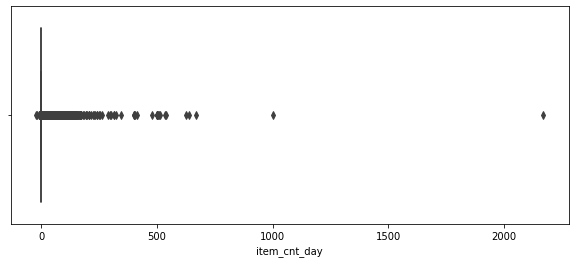

In [20]:
plt.figure(figsize = (10,4))
#'item_cnt_day' and 'item_price' are the measure dimensions
sns.boxplot(x=sales['item_cnt_day'])

<AxesSubplot:xlabel='item_price'>

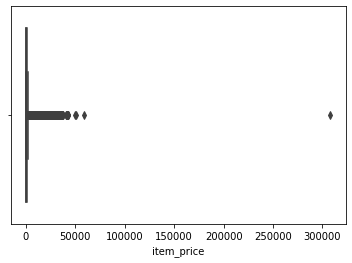

In [21]:
sns.boxplot(x=sales['item_price'])

In [22]:
#we can see there are a lot of 'item_cnt_day' data equal to '-1', so we need to figure out what the meaning is.
#we select one item to look into and found '-1' perhaps meant retreat. I think these data can be covered by corresponding trade while 'sum'.
sales[(sales['date_block_num'] == 23)&(sales['item_id']==5613)] #totally 7356 records

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon
198152,2014-12-13,23,42,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"СПб ТК ""Невский Центр""",СПб,59.939,30.316
377685,2014-12-01,23,31,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Москва ТЦ ""Семеновский""",Москва,55.750,37.617
716986,2014-12-27,23,45,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Самара ТЦ ""ПаркХаус""",Самара,53.199,50.114
1410584,2014-12-27,23,14,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Казань ТЦ ""ПаркХаус"" II",Казань,55.782,49.124
1535525,2014-12-22,23,58,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Якутск ТЦ ""Центральный""",Якутск,62.027,129.732
1867619,2014-12-25,23,44,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Самара ТЦ ""Мелодия""",Самара,53.199,50.114
1929694,2014-12-03,23,57,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Якутск Орджоникидзе, 56",Якутск,62.027,129.732
2586561,2014-12-19,23,5,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Вологда ТРЦ ""Мармелад""",Вологда,59.219,39.893
2754156,2014-12-19,23,17,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Красноярск ТЦ ""Взлетка Плаза""",Красноярск,56.009,92.873
2840934,2014-12-20,23,48,5613,6090.000,1.000,2014,11,31,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,Аксессуары,"Томск ТРЦ ""Изумрудный Город""",Томск,58.325,81.529


In [23]:
#for the one over 2000 pieces, replace it with its own item's mean
sales.loc[(sales['item_cnt_day'] > 1000),'item_cnt_day'] = sales.loc[(sales['item_id'] == 11373),'item_cnt_day'].mean()
#for the price below 0, replace it with its own item's mean
sales.loc[(sales['item_price'] < 0),'item_price'] = sales.loc[(sales['item_id'] == 2973)&(sales.item_price>=0),'item_price'].mean()
#when we see the one's price is over 100000, we find that is only one item in the table. Oh, it seems to be salary. We should not replace it. Keep it away anyway.
sales[(sales['item_price'] > 100000)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon
2803382,2013-12-13,11,12,6066,307980.000,1.000,2013,11,31,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,Программы,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284


##### Calculate the total sales per shop per item per month

In [24]:
sales['total_tr'] = sales['item_price'] * sales['item_cnt_day']
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon,total_tr
0,2013-01-01,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
1,2013-01-03,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
2,2013-01-28,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
3,2013-02-03,1,18,5823,2500.000,1.000,2013,1,28,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
4,2013-02-09,1,18,5823,2500.000,1.000,2013,1,28,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13095,500.000,2.000,2015,9,31,Карта оплаты Windows: 500 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,1000.000
2935845,2015-09-16,32,55,13094,2500.000,1.000,2015,8,30,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,2500.000
2935846,2015-09-22,32,55,13094,2500.000,2.000,2015,8,30,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,5000.000
2935847,2015-09-21,32,55,13091,1000.000,1.000,2015,8,30,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,1000.000


### EDA

Before we begin, I need to carry with some questions to prepare the data.
<ol>
<li>Missing data?* (solved above) </li>
<li>Repeated data?* (solved above)</li>
<li>What are the top sales of items (their categories)? </li>
<li>What are the top sales of shops? </li>
<li>What are the top sales of city? are they related to geographical location? </li>
<li>What are the distribution of item price and total items sold by each shop? </li>
<li>What are the effect on price and sales of common items? </li>
<li>What's the range of date sales by each items? </li>
<li>Are there any peak in specifical holidays of Russia? What are the top sales of items in these holidays? </li>
<li>Any shop dropped down during this period, for what perhaps?</li>
<li>Any items not more sold? </li>
<li>Class pie chart, can I? </li>
<li>When are the heat days for selling Games?</li>
</ol>

##### 1.Item sales

In [25]:
#1.1 Look close to top sales by item
sales_per_item = sales[['item_id','item_name','item_cnt_day','total_tr']].groupby(['item_id','item_name']).agg(sales_per_item = ('item_cnt_day','sum'),sales_price = ('total_tr','sum'))
sales_per_item['sales_per_item'] = sales_per_item['sales_per_item'].astype(np.int32)
sales_per_item.sort_values('sales_per_item',inplace = True,ascending=False)
sales_per_item.reset_index(inplace=True)
sales_per_item[0:10]

,item_id,item_name,sales_per_item,sales_price
0,20949,Фирменный пакет майка 1С Интерес белый (34*42)...,187642,928863.700
1,2808,"Diablo III [PC, Jewel, русская версия]",17245,16852778.420
2,3732,"Grand Theft Auto V [PS3, русские субтитры]",16642,43617975.480
3,17717,Прием денежных средств для 1С-Онлайн,15830,17200825.930
4,5822,Playstation Store пополнение бумажника: Карта ...,14515,15408983.120
5,3734,"Grand Theft Auto V [Xbox 360, русские субтитры]",11688,31065160.270
6,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,10289,219391488.920
7,3731,"Grand Theft Auto V [PC, русские субтитры]",10099,19983482.890
8,1855,"Battlefield 4 [PC, русская версия]",10032,9357024.780
9,16787,"Одни из нас [PS3, русская версия]",9227,21907839.080


In [26]:
sales_per_item.tail(5)

,item_id,item_name,sales_per_item,sales_price
21802,7547,VideoStudio Pro X6 IE Windows Mini-Box,0,0.000
21803,13474,Комплект «Sony PS3 (320 Gb) (CECH-2508B) + игр...,-1,-10398.000
21804,18062,Робопет Собака,-1,-4999.000
21805,11871,Змея,-1,-5999.000
21806,1590,"Assassin’s Creed 3. Freedom Edition [PC, русск...",-11,-28589.000


In [27]:
#1.2 Look close to top total sale price by item
sales_price_per_item = sales_per_item.copy()
sales_price_per_item.sort_values('sales_price',inplace = True,ascending=False)
sales_price_per_item[0:10] 

,item_id,item_name,sales_per_item,sales_price
6,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,10289,219391488.920
2,3732,"Grand Theft Auto V [PS3, русские субтитры]",16642,43617975.480
387,13443,Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B0...,1366,34331245.280
5,3734,"Grand Theft Auto V [Xbox 360, русские субтитры]",11688,31065160.270
21,3733,"Grand Theft Auto V [PS4, русские субтитры]",6506,22298864.360
9,16787,"Одни из нас [PS3, русская версия]",9227,21907839.080
7,3731,"Grand Theft Auto V [PC, русские субтитры]",10099,19983482.890
617,13405,"Комплект ""Microsoft Xbox One 500GB (Day One Ed...",991,18125479.520
3,17717,Прием денежных средств для 1С-Онлайн,15830,17200825.930
20,5823,Playstation Store пополнение бумажника: Карта ...,6523,17151846.090


In [28]:
sales_price_per_item.tail(5)

,item_id,item_name,sales_per_item,sales_price
21804,18062,Робопет Собака,-1,-4999.000
21805,11871,Змея,-1,-5999.000
21801,13477,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,0,-7592.000
21803,13474,Комплект «Sony PS3 (320 Gb) (CECH-2508B) + игр...,-1,-10398.000
21806,1590,"Assassin’s Creed 3. Freedom Edition [PC, русск...",-11,-28589.000


In [29]:
#We can easily observe that item 13477 had negative total sales price though it sold 0 pieces.
#While we look close to this item, we can find that it is because of the crazily increase in price. It is common on PS3 at that time. 
#Unfortunately, the store lost some money. Therefore, it is resonable to save the 'item_cnt_day'<1.
sales[sales['item_id']==13477]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon,total_tr
749128,2013-07-27,6,45,13477,6398.000,1.000,2013,6,31,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,11,Игровые консоли - PS3,Игровые консоли,"Самара ТЦ ""ПаркХаус""",Самара,53.199,50.114,6398.000
2422469,2013-08-08,7,16,13477,13990.000,-1.000,2013,7,31,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,11,Игровые консоли - PS3,Игровые консоли,"Коломна ТЦ ""Рио""",Коломна,55.100,38.781,-13990.000


In [30]:
#1.1Top 10 sale-price items
x=sales_per_item['item_id'][0:10].astype(str)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=sales_per_item['sales_per_item'][0:10], marker=dict(color= '#496595'),
                     name='sales_per_item', offsetgroup=1))
fig.add_trace(go.Bar( x=x, y=sales_per_item['sales_price'][0:10], marker=dict(color='#c6ccd8'),
                     name='sales_price',
                     xaxis='x',yaxis='y2', offsetgroup=2))                                    
fig.update_yaxes(showticklabels=False,showgrid = False)
fig.update_xaxes(title_text='Item ID',showgrid = False)
#fig.update_xaxes(title_text='Item ID')

fig.update_layout(yaxis=dict(title='Item Sales Counts',title_font=dict(color='#496595',size=20))
                  ,yaxis2=dict(title='Total Sales Price',anchor='x',overlaying='y',side='right',title_font=dict(color='#c6ccd8',size=20),showgrid = False,showticklabels=False),height=300,bargap=0.1,
                  margin=dict(b=0,r=20,l=20), #xaxis=dict(tickmode='linear'),
                  title_text="Top sale items",
                  template="plotly_white",
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  barmode='group')
pyoff.iplot(fig)
#Here thanks to KASHISH RASTOGI:https://www.kaggle.com/kashishrastogi/store-sales-analysis-time-serie

In [31]:
#1.2.Top 10 income sources in this store
x=sales_price_per_item['item_id'][0:10].astype(str)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=sales_price_per_item['sales_per_item'][0:10], marker=dict(color= '#5b928e',opacity=0.5),
                     name='sales_per_item', offsetgroup=1))
fig.add_trace(go.Bar( x=x, y=sales_price_per_item['sales_price'][0:10], marker=dict(color='#446d6a'),
                     name='sales_price',
                     xaxis='x',yaxis='y2', offsetgroup=2))                                   
fig.update_yaxes(showticklabels=False,showgrid = False)
fig.update_xaxes(title_text='Item ID',showgrid = False)
fig.update_layout(yaxis=dict(title='Item Sales Counts',title_font=dict(color='#446d6a',size=20))
                  ,yaxis2=dict(title='Total Sales Price',anchor='x',overlaying='y',side='right',title_font=dict(color='#5b928e',size=20),showgrid = False,showticklabels=False),height=300,bargap=0.1,
                  margin=dict(b=0,r=20,l=20), #xaxis=dict(tickmode='linear'),
                  title_text="Top sales Price items",
                  template="plotly_white",
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  barmode='group')
pyoff.iplot(fig)

##### Small Conclusion:
<ol>The most popular sales are:
    <li>Corporate package T-shirt</li>
    <li>Games of PC/PS3</li>
    <li>Games funding cards</li>
    However, interestingly, the unit price of T-shirt is low causing its total sales price is quite low. The games and hosts cost a lot instead.Looking closely, we can suggest that one game in PS sold more expensive than that in PC and Xbox.</ol>
<ol> The most income sources are:
    <li>PS4 (New version Release at that time)</li>
    <li>Games for PS</li>
    <li>Game funding cards</li>
    It seems that PS-related products are very hot sale.However, we should know that PS is from a Janpanese company and often out of stock.
</ol>
Here, we can collect some special products to see their features to figure out some something else later.
(Whether price fluctuation affects the sales /the sales trends of special products:6675[PS4],20949[T-shirt],3732[Grand Theft Auto V PS3],3734[Grand Theft Auto V Xbox],17717[Acceptance of funds],3733[Grand Theft Auto V PS4],3731[Grand Theft Auto V PC],13405[Xbox],5823[PS funds card])

In [32]:
#Key product sale trends analysis
top1_sales = sales[sales['item_id']==20949][['item_cnt_day','date_block_num']]
top1_sales = top1_sales.groupby('date_block_num').sum()
top1_sales.reset_index(inplace=True)

top2_sales = sales[sales['item_id']==6675][['item_cnt_day','date_block_num']]
top2_sales = top2_sales.groupby('date_block_num').sum()
top2_sales.reset_index(inplace=True)

top3_sales = sales[sales['item_id']==3732][['item_cnt_day','date_block_num']]
top3_sales = top3_sales.groupby('date_block_num').sum()
top3_sales.reset_index(inplace=True)

top4_sales = sales[sales['item_id']==3734][['item_cnt_day','date_block_num']]
top4_sales = top4_sales.groupby('date_block_num').sum()
top4_sales.reset_index(inplace=True)

top5_sales = sales[sales['item_id']==3733][['item_cnt_day','date_block_num']]
top5_sales = top5_sales.groupby('date_block_num').sum()
top5_sales.reset_index(inplace=True)

top6_sales = sales[sales['item_id']==3731][['item_cnt_day','date_block_num']]
top6_sales = top6_sales.groupby('date_block_num').sum()
top6_sales.reset_index(inplace=True)

top7_sales = sales[sales['item_id']==17717][['item_cnt_day','date_block_num']]
top7_sales = top7_sales.groupby('date_block_num').sum()
top7_sales.reset_index(inplace=True)

top8_sales = sales[sales['item_id']==13405][['item_cnt_day','date_block_num']]
top8_sales = top8_sales.groupby('date_block_num').sum()
top8_sales.reset_index(inplace=True)

top9_sales = sales[sales['item_id']==5823][['item_cnt_day','date_block_num']]
top9_sales = top9_sales.groupby('date_block_num').sum()
top9_sales.reset_index(inplace=True)


fig=go.Figure()
fig = make_subplots(rows=2, cols=1, horizontal_spacing=0.04,
    specs=[[{"type": "Scatter"}], [{"type": "Table"}]])

fig.add_trace(go.Scatter(x=top1_sales['date_block_num'],y=top1_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID20949', marker=dict(color='#6D83AA')))
fig.add_trace(go.Scatter(x=top2_sales['date_block_num'],y=top2_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID6675', marker=dict(color='#db940f')))
fig.add_trace(go.Scatter(x=top3_sales['date_block_num'],y=top3_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID3732', marker=dict(color='#334668')))
fig.add_trace(go.Scatter(x=top4_sales['date_block_num'],y=top4_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID3734', marker=dict(color='#147d37')))
fig.add_trace(go.Scatter(x=top5_sales['date_block_num'],y=top5_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID3733', marker=dict(color='#191585')))
fig.add_trace(go.Scatter(x=top6_sales['date_block_num'],y=top6_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID3731', marker=dict(color='#b374cc')))
fig.add_trace(go.Scatter(x=top7_sales['date_block_num'],y=top7_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID17717', marker=dict(color='#5b9653')))
fig.add_trace(go.Scatter(x=top8_sales['date_block_num'],y=top8_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID13405', marker=dict(color='#e38952')))
fig.add_trace(go.Scatter(x=top9_sales['date_block_num'],y=top9_sales['item_cnt_day'],mode='lines',showlegend=True, 
                         name='ID5823', marker=dict(color='#9e245f')))

fig.update_yaxes(title_text='Sales',showgrid=True)
                 #zeroline=False)
fig.update_xaxes(title_text='Months',showgrid=False)
#fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=500,width=800,
                  title="<span style='font-size:20px; font-family:Times New Roman'>Sales on Five Key Products</span>",
                  margin=dict(t=80,b=10,r=20,l=20),
                  template="plotly_white",
                  #plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="h", yanchor="bottom", xanchor="center", x=0.5, y=0.3,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

Small Conclusion:
T-shirt kept stable sales until 2015. We assume that the style of it is a little out of date causing the decrease of sales. Comparing to the same game in different stations, Grand Theft Auto V on PS3 was more popular than that on Xbox and they attended to the similar trend in later months (The sales of PS4 was also better than Xbox). After PS4 released, the game on PS4 sold so so, not good as that on PC. People always kept paying for game funds cards and the sales of them were stable during the period.

In [33]:
#1.3 Item-Category Sales
sales_per_cat = sales[['item_category_id','item_category_name','item_cnt_day','total_tr']].groupby(['item_category_name']).agg(sales_per_cat= ('item_cnt_day','sum'),sales_price = ('total_tr','sum'))
sales_per_cat['sales_per_cat'] = sales_per_cat['sales_per_cat'].astype(np.int32)
sales_per_cat.sort_values('sales_per_cat',inplace = True,ascending=False)
sales_per_cat.reset_index(inplace=True)
sales_per_cat[0:10]

,item_category_name,sales_per_cat,sales_price
0,Кино - DVD,634171,169944221.690
1,Игры PC - Стандартные издания,456540,257519291.080
2,Музыка - CD локального производства,348591,100022563.570
3,Игры - PS3,254887,412052326.149
4,Кино - Blu-Ray,203284,90478731.840
5,"Подарки - Сумки, Альбомы, Коврики д/мыши",187998,934206.610
6,Игры PC - Дополнительные издания,174954,136419148.640
7,Игры - XBOX 360,169944,259619128.350
8,Игры - PS4,127319,373010312.010
9,Подарки - Настольные игры (компактные),73077,24727890.560


In [34]:
#1.4 Item-Main Category Sales
sales_per_main_cat = sales[['item_category_id','item_maincategory_name','item_cnt_day','total_tr']].groupby(['item_maincategory_name']).agg(sales_per_main_cat= ('item_cnt_day','sum'),sales_price = ('total_tr','sum'))
sales_per_main_cat['sales_per_main_cat'] = sales_per_main_cat['sales_per_main_cat'].astype(np.int32)
sales_per_main_cat.sort_values('sales_per_main_cat',inplace = True,ascending=False)
sales_per_main_cat.reset_index(inplace=True)
sales_per_main_cat[0:10]

,item_maincategory_name,sales_per_main_cat,sales_price
0,Игры,1335994,1631854142.349
1,Кино,916943,334987968.190
2,Подарки,584366,309146571.480
3,Музыка,411294,149719998.790
4,Аксессуары,85056,166386781.450
5,Книги,76341,30348897.240
6,Программы,74954,122390895.130
7,Карты оплаты,53883,72953095.720
8,Игровые консоли,32155,528028109.440
9,Служебные,21966,25561625.930


In [35]:
# pie chart preparation
sales_per_main_re = sales_per_main_cat.copy()
sales_per_main_other = sales_per_main_re[6:14].sum()
sales_per_main_other = pd.DataFrame(sales_per_main_other)
sales_per_main_other = sales_per_main_other.T
sales_per_main_other.iloc[0,0] = 'Others'
sales_per_main_re = sales_per_main_re[0:5].append(sales_per_main_other)
sales_per_main_re.reset_index(inplace=True)

In [36]:
#Visualize the category sales
fig = go.Figure()
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.4,
                    specs=[[{"colspan": 2},None], [{"type": "pie"},{"type": "bar"}]],
                    column_widths=[0.3,0.7],vertical_spacing=0.2,
                    subplot_titles=('15 Main-Category Sales Situation','84 Categories Sales Situation','Categories Sales Amount'))

fig.add_trace(go.Scatter(
                    x=sales_per_main_cat['item_maincategory_name'],
                    y=sales_per_main_cat['sales_per_main_cat'],
                    mode='markers',
                    marker=dict(
                    color=sales_per_main_cat['sales_per_main_cat'],
                    size=sales_per_main_cat['sales_price'].values/10000000,
                    showscale=True
                        )
                ),row=1,col=1)


fig.add_trace(go.Pie(values=sales_per_main_re['sales_per_main_cat'], labels=sales_per_main_re['item_maincategory_name'], name='Quarter',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.1,
                     hoverinfo='label+percent+value', textinfo='label+percent'),row=2,col=1)

fig.add_trace(go.Bar(x=sales_per_cat['sales_per_cat'], y=sales_per_cat['item_category_name'], marker=dict(color= '#5bb5ad',opacity=1),
                     name='Sales',orientation='h'),row=2,col=2)

#fig.update_xaxes(visible=False, row=2, col=1)
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=2, col=2)
fig.update_xaxes(visible=False, row=2, col=2)


fig.update_xaxes(showgrid=False,tickfont=dict(color='#8a8d93',size=10),
                 title_font=dict(size=10),row=2,col=2)
fig.update_yaxes(showgrid=False)
fig.update_layout(height=1000, #xaxis_title='Main Category Name', 
                  yaxis_title='Sales Count',
                  margin=dict(b=10), title_text="15 Main-Category Sales Situation",
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=15, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),showlegend = False)
fig.show()

##### Small Conclusion:
<ol>The most popular sales main categories are:
    <li>Games</li>
    <li>Movies</li>
    <li>Present</li>
    <li>Music</li>
    <li>Accessories</li>
    Look more close to categories, we can find games sales on PC generally better than that on PS3 and PS4, then following by that on Xbox. While the price of hosts was so high, they took a large part of total sales income.</ol>

In [37]:
#1.5 Look close to unit price by item
price_sit = sales[["item_id","item_name","item_price"]].groupby(["item_id","item_name"]).agg(price_min = ("item_price","min"),price_max = ("item_price","max"),price_mean = ("item_price","mean"))
price_sit.sort_values('price_max',inplace = True, ascending=False)
price_sit.reset_index(inplace=True)
price_sit[2:11]
#Ignore the first two items
##The 10 most expensive items

,item_id,item_name,price_min,price_max,price_mean
2,13199,Коллекционные шахматы (Властелин Колец),50999.000,50999.000,50999.000
3,7241,UserGate Proxy & Firewall 6.X с модулем фильтр...,49782.000,49782.000,49782.000
4,13403,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",28992.000,42990.000,39990.500
5,7238,UserGate Proxy & Firewall 6.X до 100 сессий,42000.000,42000.000,42000.000
6,14173,Лицензия 1С-Битрикс: Управление сайтом - Эксперт,40900.000,40900.000,40900.000
7,2410,CorelDRAW Graphics Suite X6 - Small Business E...,32437.000,36990.000,34713.500
8,5748,Photoshop 13 Windows Russian BOX,32990.000,36990.000,35132.857
9,13404,"Комплект ""Microsoft Xbox One 500GB (Black Box)...",22400.000,35990.000,26988.238
10,13406,"Комплект ""Microsoft Xbox One 500GB"" + ""Xbox On...",22399.000,35490.000,27857.315


In [38]:
price_sit.tail(5)

,item_id,item_name,price_min,price_max,price_mean
21802,22010,"Щелкунчик и Крысиный король [PC, Jewel]",14.000,14.000,14.000
21803,13090,Карта города Жуковский,11.000,11.000,11.000
21804,4881,"Monday Night Combat [PC, Цифровая версия]",10.000,10.000,10.000
21805,22098,Элемент питания КОСМОС LR03 2*BL,7.000,7.000,7.000
21806,20949,Фирменный пакет майка 1С Интерес белый (34*42)...,1.830,5.000,4.915


In [39]:
#We ignore EMS price fluctuation but we still need to see some details
freight_EMS = sales[sales['item_id']==11365]
freight_EMS.sort_values('item_price',ascending=False,inplace=True)
freight_EMS
#We can see the freight was always different, so it is common. 
#And it was the highest on 2013-09-17 and there were high investifation on it in 2013.

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon,total_tr
2806768,2013-09-17,8,12,11365,59200.000,1.000,2013,8,30,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,59200.000
2806707,2013-03-05,2,12,11365,14530.000,1.000,2013,2,31,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,14530.000
2806769,2013-09-23,8,12,11365,11880.000,1.000,2013,8,30,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,11880.000
2806711,2013-03-12,2,12,11365,10540.000,1.000,2013,2,31,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,10540.000
2806773,2013-09-28,8,12,11365,9370.000,1.000,2013,8,30,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,9370.000
2806777,2013-10-10,9,12,11365,7750.000,1.000,2013,9,31,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,7750.000
2806771,2013-09-25,8,12,11365,7240.000,1.000,2013,8,30,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,7240.000
2806713,2013-03-14,2,12,11365,6950.000,1.000,2013,2,31,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,6950.000
2806788,2013-11-05,10,12,11365,6500.000,1.000,2013,10,30,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,6500.000
2806761,2013-08-27,7,12,11365,6040.000,1.000,2013,7,31,Доставка (EMS),9,Доставка товара,Доставка,Интернет-магазин ЧС,Интернет-магазин,46.676,38.284,6040.000


In [40]:
#1.5.Plot for price
x = price_sit['item_id'][2:12].astype(str)
y1 = price_sit['price_mean'][2:12]
y2 = price_sit['price_min'][2:12]
y3 = price_sit['price_max'][2:12]
fig=go.Figure()
fig = make_subplots(rows=2, cols=1, horizontal_spacing=0.04,
    specs=[[{"type": "Scatter"}], [{"type": "Table"}]])

fig.add_traces([go.Scatter(x = x, y = y2, 
                              line = dict(color='rgba(105, 238, 250,0)'),name='low price'),
                
                  
               go.Scatter(x = x, y = y3,
                              line = dict(color='rgba(105, 238, 250,0)'),
                              fill='tonexty', 
                              fillcolor = 'rgba(129, 238, 247,0.3)',name='high price'),
               go.Scatter(x = x, y = y1, 
                              line = dict(color='rgba(33, 141, 181,1)'),name='mean price')])


fig.add_trace(go.Table(
            header=dict(
                  values=['<b>Item ID</b>','<b>Item Name</b>','<b>Mean Price</b>'],                                  
                  line_color='white',
                  fill_color='rgba(33, 141, 181,0.5)',
                  align=['left','center'],
                  font=dict(color='#8a8d93', size=14)
        ),
            cells=dict(
                  values=[price_sit['item_id'][2:12].values.tolist(), price_sit['item_name'][2:12].values.tolist(), 
                     price_sit['price_mean'][2:12].values.tolist(),],
                  line_color='white',
            # 2-D list of colors for alternating rows
                  fill_color = 'rgba(144, 212, 206,0.1)',
                  align = ['left', 'center'],
                  font = dict(color = '#8a8d93', size = 12))),       
                  row=2, col=1)
    


fig.update_yaxes(title_text='Price (₽)')
fig.update_xaxes(title_text='Item ID')
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=700, bargap=0.2,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Top 10 Expensive items (ignore salary and freight)",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  )

fig.show()

Small conclusion: The most expensive product is Collection chess (Lord of the Rings). It must be expensive for it is a collection set. While the cheapest one is the hot sales one: T-shirt. Look at the plot with price changing range, w can feel that the products in this store must often change their price. Does the action influence the sales or not?

In [41]:
#1.6 put the items which changed price into a table for presentation
change_price = pd.DataFrame()
for i, text in enumerate (price_sit['price_min']):    
        if text != price_sit.loc[i,'price_max']:
            change_price = change_price.append(price_sit.iloc[i,:])
change_price

,item_id,item_name,price_min,price_max,price_mean
1,11365.000,Доставка (EMS),124.000,59200.000,1887.565
4,13403.000,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",28992.000,42990.000,39990.500
7,2410.000,CorelDRAW Graphics Suite X6 - Small Business E...,32437.000,36990.000,34713.500
8,5748.000,Photoshop 13 Windows Russian BOX,32990.000,36990.000,35132.857
9,13404.000,"Комплект ""Microsoft Xbox One 500GB (Black Box)...",22400.000,35990.000,26988.238
...,...,...,...,...,...
21783,8025.000,ZL007 Лазерные наклейки Аниме 1,15.000,20.000,16.667
21784,13598.000,"Крафт пакет ""Интересные подарки""-оранжевый",9.000,20.000,13.013
21785,8026.000,ZL008 Лазерные наклейки Аниме 2,15.000,20.000,17.436
21786,4276.000,"Krater [PC, Цифровая версия]",19.000,20.000,19.111


Here is the table showing the product situation with price fluctuation.

In [42]:
#1.6 wanna research the effect of price change and sales
change_price_sales = sales.groupby(["item_id","item_name",'item_price']).agg(each_price_sales = ("item_cnt_day","sum"),each_price_income = ("total_tr","sum"))
#change_price_sales.sort_values('price_max',inplace = True, ascending=False)
change_price_sales.reset_index(inplace=True)
change_price_sales

,item_id,item_name,item_price,each_price_sales,each_price_income
0,0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,58.000,1.000,58.000
1,1,!ABBYY FineReader 12 Professional Edition Full...,4490.000,6.000,26940.000
2,2,***В ЛУЧАХ СЛАВЫ (UNV) D,58.000,2.000,116.000
3,3,***ГОЛУБАЯ ВОЛНА (Univ) D,58.000,1.000,58.000
4,3,***ГОЛУБАЯ ВОЛНА (Univ) D,100.000,1.000,100.000
...,...,...,...,...,...
120211,22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,287.000,5.000,1435.000
120212,22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,299.000,1298.000,388102.000
120213,22168,Яйцо для Little Inu,798.500,1.000,798.500
120214,22168,Яйцо для Little Inu,799.000,5.000,3995.000


Here is the table showing the relation between price and sales of above special products.

In [43]:
#1.6 special for specific goods
text = [6675,3732,3734,17717,20949,3731,13405,3733,5823]
#6675[PS4],20949[T-shirt],3732[Grand Theft Auto V PS3],3734[Grand Theft Auto V Xbox],17717[Acceptance of funds],3733[Grand Theft Auto V PS4],3731[Grand Theft Auto V PC],13405[Xbox],5823[PS funds card]
change_price_spec = pd.DataFrame()
for i in text:        
        change_price_spec =change_price_spec.append(change_price_sales[change_price_sales['item_id']==i])
change_price_spec.reset_index(inplace=True)
change_price_spec

,index,item_id,item_name,item_price,each_price_sales,each_price_income
0,41221,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,14992.000,1.000,14992.000
1,41222,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16740.000,4.000,66960.000
2,41223,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16791.500,2.000,33583.000
3,41224,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16792.000,1.000,16792.000
4,41225,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,17141.000,1.000,17141.000
...,...,...,...,...,...,...
2777,35101,5823,Playstation Store пополнение бумажника: Карта ...,2699.000,262.000,707138.000
2778,35102,5823,Playstation Store пополнение бумажника: Карта ...,2705.667,6.000,16234.000
2779,35103,5823,Playstation Store пополнение бумажника: Карта ...,2798.500,4.000,11194.000
2780,35104,5823,Playstation Store пополнение бумажника: Карта ...,2798.750,2.000,5597.500


In [44]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [45]:
#1.6 normalized the price and sales features
a=0
b=0
text_p = []
text_s = []
item_price_nor = []
sales_nor = []
for i in [6675,3732,3734,17717,20949,3731,13405,3733,5823]:    
    text_p =  normalization(change_price_spec[change_price_spec['item_id']==i]['item_price']) 
    text_s =  normalization(change_price_spec[change_price_spec['item_id']==i]['each_price_sales']) 
    item_price_nor.extend(text_p)
    sales_nor.extend(text_s)
    a = len(text_p)
    b = b+a
b

2782

In [46]:
#1.6 merge the result with the original table
change_price_spec['item_price_nor'] = item_price_nor
change_price_spec['each_price_sales_nor'] = sales_nor
change_price_spec

,index,item_id,item_name,item_price,each_price_sales,each_price_income,item_price_nor,each_price_sales_nor
0,41221,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,14992.000,1.000,14992.000,0.000,0.000
1,41222,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16740.000,4.000,66960.000,0.125,0.002
2,41223,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16791.500,2.000,33583.000,0.129,0.001
3,41224,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,16792.000,1.000,16792.000,0.129,0.000
4,41225,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,17141.000,1.000,17141.000,0.154,0.000
...,...,...,...,...,...,...,...,...
2777,35101,5823,Playstation Store пополнение бумажника: Карта ...,2699.000,262.000,707138.000,0.891,0.054
2778,35102,5823,Playstation Store пополнение бумажника: Карта ...,2705.667,6.000,16234.000,0.898,0.001
2779,35103,5823,Playstation Store пополнение бумажника: Карта ...,2798.500,4.000,11194.000,0.999,0.001
2780,35104,5823,Playstation Store пополнение бумажника: Карта ...,2798.750,2.000,5597.500,1.000,0.000


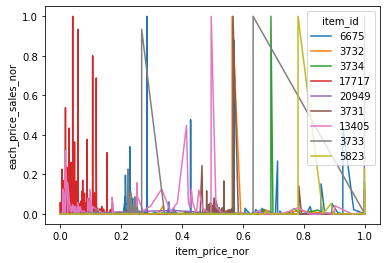

In [47]:
#1.6 plot the price change Vs. sales
#print(i,change_price_sit[change_price_sit['item_id'] == i])  
sns.lineplot(y=change_price_spec['each_price_sales_nor'],x=change_price_spec['item_price_nor'],hue=change_price_spec['item_id'].astype(str))
plt.show()


In [48]:
#1.6 show changes
fig = go.Figure()
fig=px.line(change_price_spec,x='item_price_nor',y='each_price_sales_nor',color='item_id')
fig.update_xaxes(title_text='Price Change')
fig.update_yaxes(title_text='Sales Change')
fig.update_layout(height=700, bargap=0.2,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="The Relation Between Price and Sales for Specific products",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  )

fig.show()

Small conclusion: We can see the sales of hosts like PS4 and Xbox seem not to be affected by price. According to the marketing, the price of hosts always boomingly increase because of out of stock.
Interestingly, the rise of the price of T-shirt made the hot sales. good sales of games were usually with the intermedium price. The funds cards were obviously affected by price with good sales in the lower price, while PS funds cards shows better sales with higher price. It perhaps had something else affected.

##### 2.Shops/Cities

In [49]:
#2.1 Look at sales on per item in each shops
sales_per_item_shop = sales[['shop_id','item_id','item_cnt_day','total_tr']].groupby(['shop_id','item_id']).agg(sales_per_item_shop = ('item_cnt_day','sum'),sales_price_per_item_shop = ('total_tr','sum'))
sales_per_item_shop['sales_per_item_shop'] = sales_per_item_shop['sales_per_item_shop'].astype(np.int32)
sales_per_item_shop

sales_per_item_shop  sales_price_per_item_shop
shop_id item_id                                                
2       27                         2                   2997.000
        30                         4                   1096.000
        31                         8                   5008.420
        32                        11                   1609.000
        33                        11                   2489.000
...                              ...                        ...
59      22154                      1                    999.000
        22155                      1                    149.000
        22162                     16                   6234.000
        22164                      6                   4344.000
        22167                      4                   1196.000

[418909 rows x 2 columns]

In [50]:
#2.2 how many items sold in each shop
sales_item_num_shop = sales.groupby("shop_id").agg(item_num = ("item_id",lambda x: x.nunique()))
#sales_item_num_shop = sales.groupby(['shop_id']).agg(item_num = ('item_id','count'))
#sales_item_num_shop['item_num'] = sales_item_num_shop['sales_per_item_shop'].astype(np.int32)
sales_item_num_shop.reset_index(inplace=True)
sales_item_num_shop

,shop_id,item_num
0,2,4849
1,3,5261
2,4,7309
3,5,7084
4,6,11856
5,7,8246
6,8,1909
7,9,1404
8,11,6054
9,12,7382


In [51]:
fig = go.Figure()
fig=px.bar(sales_item_num_shop,x='shop_id',y='item_num')
fig.update_xaxes(title_text='Item Counts')
fig.update_yaxes(title_text='Shop ID')
fig.update_layout(height=700, bargap=0.2,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="The Item Amount in each shop",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  )

fig.show()

Here is the table showing the amount of categories sold by each shop.

In [52]:
#2.3 how many categories sold in each shop
sales_cat_num_shop = sales.groupby("shop_id").agg(cat_num = ("item_category_id",lambda x: x.nunique()))
#sales_item_num_shop = sales.groupby(['shop_id']).agg(item_num = ('item_id','count'))
#sales_item_num_shop['item_num'] = sales_item_num_shop['sales_per_item_shop'].astype(np.int32)
sales_cat_num_shop.reset_index(inplace=True)
sales_cat_num_shop

,shop_id,cat_num
0,2,59
1,3,58
2,4,61
3,5,60
4,6,63
5,7,60
6,8,43
7,9,38
8,11,57
9,12,64


In [53]:
fig = go.Figure()
fig.add_trace(go.Bar( x=sales_cat_num_shop['shop_id'],y=sales_cat_num_shop['cat_num'],marker=dict(color= '#e8c366')))
fig.update_xaxes(title_text='Item Counts')
fig.update_yaxes(title_text='Shop ID')
fig.update_layout(height=700, bargap=0.2,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="The Category Amount in each shop",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False,
                  )

fig.show()

Small conclusion: Some branches had small amount of items and categories to sell. We can obverse them with an eye.(shop id: 8, 9, 13, 20, 24, 32, 33, 34, 36, 40, 55)

In [54]:
#2.4 how many main categories sold in each shop
sales_main_cat_num_shop = sales.groupby("shop_id").agg(cat_num = ("item_maincategory_name",lambda x: x.nunique()))
#sales_item_num_shop = sales.groupby(['shop_id']).agg(item_num = ('item_id','count'))
#sales_item_num_shop['item_num'] = sales_item_num_shop['sales_per_item_shop'].astype(np.int32)
sales_main_cat_num_shop.reset_index(inplace=True)
sales_main_cat_num_shop

,shop_id,cat_num
0,2,13
1,3,12
2,4,13
3,5,12
4,6,13
5,7,12
6,8,10
7,9,9
8,11,11
9,12,14


In [55]:
#2.5 who sales Игры
query2 = 'select shop_id, shop_name, item_maincategory_name from sales where item_maincategory_name = "Игры"'
sales_game_shop = pysqldf(query2)
sales_game_shop['shop_name'].unique()

array(['Красноярск ТЦ "Июнь"', 'Химки ТЦ "Мега"',
       'СПб ТК "Невский Центр"', 'Чехов ТРЦ "Карнавал"',
       'Москва ТЦ "Семеновский"', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Самара ТЦ "ПаркХаус"', 'Н.Новгород ТРЦ "Фантастика"',
       'Тюмень ТЦ "Зеленый Берег"', 'Уфа ТК "Центральный"',
       'Воронеж (Плехановская, 13)', 'Калуга ТРЦ "XXI век"',
       'СПб ТК "Сенная"', 'Москва ТК "Буденовский" (пав.А2)',
       'Балашиха ТРК "Октябрь-Киномир"', 'Москва ТРК "Атриум"',
       'Москва ТК "Буденовский" (пав.К7)', 'Воронеж ТРЦ "Максимир"',
       'Казань ТЦ "ПаркХаус" II', 'РостовНаДону ТЦ "Мега"',
       'Омск ТЦ "Мега"', 'Якутск ТЦ "Центральный"',
       'Москва ТЦ "Перловский"', 'Волжский ТЦ "Волга Молл"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Курск ТЦ "Пушкинский"',
       'Ярославль ТЦ "Альтаир"', 'Сургут ТРЦ "Сити Молл"',
       'Самара ТЦ "Мелодия"', 'Жуковский ул. Чкалова 39м²',
       'Якутск Орджоникидзе, 56', 'Уфа ТЦ "Семья" 2',
       'Москва ТЦ "Новый век" (Новоко

<table style="width:20%">
<tr>
<th><Name></th>
<th><Address></th>
<th><Salary></th>
</tr>

<tr>
<td><Hanna></td>
<td><Brisbane></td>
<td><4000></td>
</tr>

<tr>
<td><Adam></td>
<td><Sydney></td>
<td><5000></td>
</tr>
</table>

In [56]:
#2.6 Look close to total sales and price in each shop
sales_per_shop = sales[['shop_id','item_id','item_cnt_day','total_tr']].groupby(['shop_id']).agg(sales_per_item_shop = ('item_cnt_day','sum'),sales_price_per_item_shop = ('total_tr','sum'))
sales_per_shop['sales_per_item_shop'] = sales_per_shop['sales_per_item_shop'].astype(np.int32)
sales_per_shop.sort_values('sales_per_item_shop',inplace = True,ascending=False)
sales_per_shop.reset_index(inplace=True)
sales_per_shop.head()

,shop_id,sales_per_item_shop,sales_price_per_item_shop
0,31,310777,235217019.050
1,25,241920,216480571.440
2,54,185790,141939673.000
3,28,184557,159746337.380
4,57,152812,119637153.530


In [57]:
#2.6
sales_price_per_shop = sales_per_shop.copy()
sales_price_per_shop.sort_values('sales_price_per_item_shop',ascending=False,inplace=True)
sales_price_per_shop.head()

,shop_id,sales_per_item_shop,sales_price_per_item_shop
0,31,310777,235217019.050
1,25,241920,216480571.440
3,28,184557,159746337.380
5,42,144934,151917032.550
2,54,185790,141939673.000


In [58]:
y = sales_per_shop['shop_id']
x = sales_per_shop['sales_per_item_shop']*-1
x1 = sales_per_shop['sales_price_per_item_shop']
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for total sales
fig.append_trace(go.Bar(x=x, y=y, orientation='h', showlegend=True, 
                        text=sales_per_shop['sales_per_item_shop'], name='Total Sales', marker_color='#d18b36'), 1, 1)
# bar plot for total sales price
fig.append_trace(go.Bar(x=x1, y=y, orientation='h', showlegend=True, text=sales_per_shop['sales_price_per_item_shop'],
                        name='Total Sales Price', marker_color='#7d613b'), 1, 2)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Sales Situation Each Shop',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  height=1000,
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig.show()

In [59]:
shops

,shop_name,shop_id,city_name,lat,lon
2,"Адыгея ТЦ ""Мега""",2,Адыгея,44.694,40.152
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,55.804,37.965
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,48.782,44.778
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,59.219,39.893
6,"Воронеж (Плехановская, 13)",6,Воронеж,51.661,39.201
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,51.661,39.201
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,51.661,39.201
9,Выездная Торговля,9,Выездная,42.827,71.484
11,Жуковский ул. Чкалова 39м²,11,Жуковский,55.597,38.120
12,Интернет-магазин ЧС,12,Интернет-магазин,46.676,38.284


Small conclusion: The most part of hot-sale branches are in Moscow. Generally speaking, branches in big cities or close to rivers or lakes have a nice sale result. Let us see the branches with bad results. Shop 8, 20, 23 and 32 need to be negociated because they located on a good place but had a very bad sales. However, bad sales in some places don't mean we need to close the branches immidiately. Russia has low density of population, and some places do need such a store to purchase some products (I mean this is a kind of social responsibility). What we can do is find a more perfect spot to build up this branch, which can lower the cost and be more convenient for citizens.

In [60]:
#2.7 City
sales_city = pd.merge(sales_per_shop, shops, on ='shop_id', how = 'inner')
sales_city

,shop_id,sales_per_item_shop,sales_price_per_item_shop,shop_name,city_name,lat,lon
0,31,310777,235217019.050,"Москва ТЦ ""Семеновский""",Москва,55.750,37.617
1,25,241920,216480571.440,"Москва ТРК ""Атриум""",Москва,55.750,37.617
2,54,185790,141939673.000,"Химки ТЦ ""Мега""",Химки,55.892,37.440
3,28,184557,159746337.380,"Москва ТЦ ""МЕГА Теплый Стан"" II",Москва,55.750,37.617
4,57,152812,119637153.530,"Якутск Орджоникидзе, 56",Якутск,62.027,129.732
5,42,144934,151917032.550,"СПб ТК ""Невский Центр""",СПб,59.939,30.316
6,27,136657,140632474.120,"Москва ТЦ ""МЕГА Белая Дача II""",Москва,55.750,37.617
7,6,100489,98067453.800,"Воронеж (Плехановская, 13)",Воронеж,51.661,39.201
8,58,88045,71975824.830,"Якутск ТЦ ""Центральный""",Якутск,62.027,129.732
9,46,78990,74189318.920,"Сергиев Посад ТЦ ""7Я""",Сергиев,56.315,38.136


In [61]:
!pip3 install openpyxl

     |████████████████████████████████| 242 kB 3.1 MB/s            


In [62]:
#folium
import openpyxl
import folium
from folium import plugins
lat = 60
lon = 90
russian_map = folium.Map(location = [lat,lon],zoom_start=4)
sales_shop_spots = plugins.MarkerCluster().add_to(russian_map)
latitudes = list(sales_city['lat'])
longitudes = list(sales_city['lon'])
labels = list(sales_city['shop_name'])

for lat, lng, label, in zip(latitudes,longitudes,labels):
    folium.Marker(
        location = [lat,lng],        
        icon = folium.Icon(color='#a11368'),
        popup = label
    ).add_to(sales_shop_spots)

for i in range(0,len(sales_city)):
    folium.Circle(
        location = [sales_city.loc[i,'lat'], sales_city.loc[i,'lon']],
        popup = sales_city.loc[i,'shop_name'],
        tooltip = sales_city.loc[i,'shop_name'],
        radius = float(sales_city.loc[i,'sales_price_per_item_shop'])/1000,
        color = 'darkblue',
        fill = True,
        fill_color = 'darkblue'
        
    ).add_to(russian_map)
russian_map

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

color argument of Icon should be one of: {'red', 'black', 'lightblue', 'darkred', 'blue', 'lightgray', 'white', 'darkblue', 'cadetblue', 'orange', 'pink', 'lightred', 'beige', 'gray', 'darkpurple', 'green', 'lightgreen', 'purple', 'darkgreen'}.



Small conclusion: Here we can clearly see that there are most branches in Moscow and better sales happened in big cities, especially, western part of Russia.

In [63]:
#2.8 sales per city
sales_per_city = sales_city.groupby('city_name').sum()[['sales_per_item_shop','sales_price_per_item_shop']]
sales_per_city.reset_index(inplace=True)
sales_per_city

,city_name,sales_per_item_shop,sales_price_per_item_shop
0,Адыгея,30620,44049638.800
1,Балашиха,28355,30140853.870
2,Волжский,43942,40539650.320
3,Вологда,42762,38160429.030
4,Воронеж,171142,167374470.350
5,Выездная,15866,16372837.000
6,Жуковский,25095,19931938.520
7,Интернет-магазин,71323,112203114.713
8,Казань,66138,52743454.680
9,Калуга,71201,68710368.400


In [64]:
#2.9 每个城市每个月的曲线
sales_per_month_city = sales.groupby(['city_name','date_block_num']).sum()[['item_cnt_day','total_tr']]
sales_per_month_city.reset_index(inplace=True)
sales_per_month_city

,city_name,date_block_num,item_cnt_day,total_tr
0,Адыгея,0,1146.000,1085064.800
1,Адыгея,1,488.000,522339.000
2,Адыгея,2,753.000,732950.000
3,Адыгея,3,583.000,614860.000
4,Адыгея,4,553.000,542429.000
...,...,...,...,...
968,Ярославль,29,913.000,862364.000
969,Ярославль,30,992.000,854894.500
970,Ярославль,31,1214.000,998975.000
971,Ярославль,32,914.000,1096854.000


In [65]:
#2.9 每个城市每個月的銷量 line-scatter

fig = px.line( sales_per_month_city, x="date_block_num", y="item_cnt_day", color="city_name")
fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales (items)')
fig.update_xaxes(title_text='Months',)
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales in Each City",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

Small Conlusion: We can see that almost each city decrease in sales in the period. This phenomenon is serious to the store. We need to figure the reason, but it seems not result from the wrong investment to some stores or the bad altitude of sales men, because nearly cities experienced similarly. Brand reputation? Economy downturn? Product price? Market saturation?

In [66]:
#2.10 every month exist the amount of shops
#shop_num_month = sales[['shop_id','date_block_num','item_cnt_day']].groupby(['date_block_num','shop_id']).agg(shop_number = ('shop_id','count'),sale_count = ('item_cnt_day','sum'))
query1 = 'select date_block_num, count(distinct(shop_id)) as shop_number,sum(item_price * item_cnt_day) as total_amount from sales group by date_block_num'
shop_num_month = pysqldf(query1)
shop_num_month.sort_values('date_block_num',inplace = True,ascending=True)
shop_num_month.reset_index(inplace=True)
shop_num_month

,index,date_block_num,shop_number,total_amount
0,0,0,45,91947091.130
1,1,1,46,90665707.370
2,2,2,46,104932687.150
3,3,3,46,69154285.550
4,4,4,45,65067357.709
5,5,5,46,79550405.830
6,6,6,46,69350599.880
7,7,7,45,74297969.640
8,8,8,45,119081891.680
9,9,9,46,107241612.530


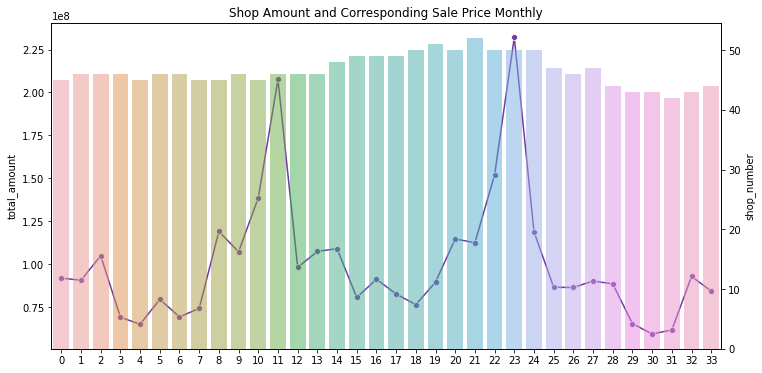

In [67]:
#2.10 matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=shop_num_month['total_amount'], marker='o', sort = False, ax=ax1,color='#7338a1',)
ax2 = ax1.twinx()
sns.barplot(x=shop_num_month['date_block_num'],y=shop_num_month['shop_number'],alpha=0.5, ax=ax2)
#plt.set_xlabel("Months")
#plt.set_ylabel("Sales Price")
#plt.ylabel2("Shop Number")
plt.title("Shop Amount and Corresponding Sale Price Monthly")
plt.show()

In [68]:
#2.11.Look close to total sales and price in each shop
sales_per_shop_month = sales.groupby(['shop_id','date_block_num']).agg(sales_per_month_shop = ('item_cnt_day','sum'),sales_price_per_month_shop = ('total_tr','sum'))
#sales_per_shop_month['sales_per_item_shop'] = sales_per_shop_month['sales_per_item_shop'].astype(np.int32)
#sales_per_shop_month.sort_values('sales_per_item_shop',inplace = True,ascending=False)
sales_per_shop_month.reset_index(inplace=True)
sales_per_shop_month

,shop_id,date_block_num,sales_per_month_shop,sales_price_per_month_shop
0,2,0,1146.000,1085064.800
1,2,1,488.000,522339.000
2,2,2,753.000,732950.000
3,2,3,583.000,614860.000
4,2,4,553.000,542429.000
...,...,...,...,...
1581,59,29,913.000,862364.000
1582,59,30,992.000,854894.500
1583,59,31,1214.000,998975.000
1584,59,32,914.000,1096854.000


In [69]:
sales_per_shop_city_month =pd.merge(sales_per_shop_month,shops,on='shop_id',how='inner')
fig= go.Figure()
fig = px.line( sales_per_shop_city_month, x="date_block_num", y="sales_per_month_shop", color="shop_name", text="sales_price_per_month_shop")
fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales (items)')
fig.update_xaxes(title_text='Months',)
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales in Each shop Every Month",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

Small conclusion: nearly every branch shows periodic sales. Also, some branches closed, reopened and new-opened. It seems that the shop amount affect the total sales a little bit. Slightly but not obviously.

In [70]:
#2.12 
sales_per_shop_item_month = sales.groupby(['shop_id','date_block_num','item_id']).agg(sales_per_month_shop_item = ('item_cnt_day','sum'),sales_price_per_month_shop_item = ('total_tr','sum'))
#sales_per_shop_month['sales_per_item_shop'] = sales_per_shop_month['sales_per_item_shop'].astype(np.int32)
#sales_per_shop_month.sort_values('sales_per_item_shop',inplace = True,ascending=False)
#sales_per_shop_item_month.reset_index(inplace=True)
sales_per_shop_item_month

sales_per_month_shop_item  \
shop_id date_block_num item_id                              
2       0              27                           1.000   
                       33                           1.000   
                       317                          1.000   
                       438                          1.000   
                       471                          2.000   
...                                                   ...   
59      33             22087                        6.000   
                       22088                        2.000   
                       22091                        1.000   
                       22100                        1.000   
                       22102                        1.000   

                                sales_price_per_month_shop_item  
shop_id date_block_num item_id                                   
2       0              27                              2499.000  
                       33                               499.000  
                       317                              299.000  
                       438                              299.000  
                       471                              798.000  
...                                                         ...  
59      33             22087                            714.000  
                       22088                            238.000  
                       22091                            179.000  
                       22100                            629.000  
                       22102                           1250.000  

[1609124 rows x 2 columns]

In [71]:

test_shop = test.copy()
test_shop.sort_values('shop_id',inplace=True)
test_shop['shop_id'].unique()

array([ 2,  3,  4,  5,  6,  7, 11, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [72]:
#2.13 shop amount
shop_num_2015_10 = sales[sales['date_block_num']==33]
shop_num_2015_10.sort_values('shop_id',inplace=True)
shop_num_2015_10 ['shop_id'].unique()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 2,  3,  4,  5,  6,  7,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22,
       24, 25, 26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47,
       48, 49, 50, 52, 53, 55, 56, 57, 58, 59])

In [73]:
#2.13 shop amount
shop_num = sales.groupby('date_block_num').agg(shop_num= ('shop_id',lambda x: x.nunique()))
shop_num.reset_index(inplace=True)
shop_num.loc[34,'date_block_num'] = '34'
shop_num.loc[34,'shop_num'] = 42
shop_num.date_block_num.astype(np.int8)
shop_num

,date_block_num,shop_num
0,0.000,45.000
1,1.000,46.000
2,2.000,46.000
3,3.000,46.000
4,4.000,45.000
5,5.000,46.000
6,6.000,46.000
7,7.000,45.000
8,8.000,45.000
9,9.000,46.000


In [74]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=shop_num["date_block_num"], y=shop_num["shop_num"],text='shop_num',line = dict(color='rgba(158, 36, 95,1)')))
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Shop Numbers')

Small conclusion: We can suggest that 2013 shows a very good sale, so the store opened more branches to purse better sale, however, for some reasons, they found the sales actually turne into badness, so they close some branches for bigger profits.

##### 3.Month/Year

In [75]:
#3.1 monthly category
sales_per_month_cat = sales.groupby(['date_block_num','item_category_name']).agg(sales_per_month_cat=('item_cnt_day','sum'),sales_price_per_month_cat=('total_tr','sum'))
sales_per_month_cat

sales_per_month_cat  \
date_block_num item_category_name                                          
0              PC - Гарнитуры/Наушники                             1.000   
               Аксессуары - PS2                                    1.000   
               Аксессуары - PS3                                 1390.000   
               Аксессуары - PS4                                  440.000   
               Аксессуары - PSP                                  251.000   
...                                                                  ...   
33             Программы - Для дома и офиса (Цифра)              184.000   
               Программы - Обучающие                              64.000   
               Программы - Обучающие (Цифра)                      64.000   
               Служебные                                         521.000   
               Элементы питания                                  348.000   

                                                     sales_price_per_month_cat  
date_block_num item_category_name                                               
0              PC - Гарнитуры/Наушники                                 148.000  
               Аксессуары - PS2                                        148.000  
               Аксессуары - PS3                                    2848554.480  
               Аксессуары - PS4                                     209160.130  
               Аксессуары - PSP                                     232099.000  
...                                                                        ...  
33             Программы - Для дома и офиса (Цифра)                 271698.000  
               Программы - Обучающие                                 14508.000  
               Программы - Обучающие (Цифра)                         18775.000  
               Служебные                                            603461.000  
               Элементы питания                                      45489.440  

[2077 rows x 2 columns]

In [76]:
#3.2 sales per cat per month
sales_per_cat_month = sales.groupby(['item_category_name','date_block_num']).agg(sales_per_month_cat=('item_cnt_day','sum'),sales_price_per_month_cat=('total_tr','sum'))
sales_per_cat_month.reset_index(inplace=True)
sales_per_cat_month['date_block_num'].astype(str)
sales_per_cat_month = pd.DataFrame(sales_per_cat_month)
sales_per_cat_month

,item_category_name,date_block_num,sales_per_month_cat,sales_price_per_month_cat
0,PC - Гарнитуры/Наушники,0,1.000,148.000
1,PC - Гарнитуры/Наушники,1,1.000,93.000
2,PC - Гарнитуры/Наушники,3,1.000,22.400
3,Аксессуары - PS2,0,1.000,148.000
4,Аксессуары - PS2,1,1.000,283.000
...,...,...,...,...
2072,Элементы питания,29,258.000,33962.000
2073,Элементы питания,30,298.000,38846.380
2074,Элементы питания,31,293.000,37989.960
2075,Элементы питания,32,277.000,37824.260


In [77]:
fig = go.Figure()
#fig = px.line( sales_per_shop_city_month, x="date_block_num", y="sales_per_month_shop", color="shop_name", text="sales_price_per_month_shop")
fig = px.line(sales_per_cat_month, x="date_block_num", y="sales_per_month_cat" , color="item_category_name" )

fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales (items)')
#fig.update_yaxes(title_text='Sales (items)',row=2,col=1)
fig.update_xaxes(title_text='Months')
#fig.update_xaxes(title_text='Months',row=2,col=1)
fig.update_traces(hovertemplate=None)

fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales in Each Category Every Month",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  #hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

Small conclusion: We assume that the main reason for decreasing sales is from sales decline of games(PC,PS3,PS4), DVD(movies), CD(music). What happene to them? Is it because of the development of technological products, people no more like them?

In [78]:
fig = px.line( sales_per_cat_month, x="date_block_num", y="sales_price_per_month_cat", color="item_category_name", text="sales_price_per_month_cat")
fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales Price (₽)')
fig.update_xaxes(title_text='Months',)
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales Price in Each Category Every Month",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

Small conclusion: For some products, price could be the reason. They increased in price.

In [79]:
#3.3 monthly main category
sales_per_month_maincat = sales.groupby(['date_block_num','item_maincategory_name']).agg(sales_per_month_maincat=('item_cnt_day','sum'),sales_price_per_month_maincat=('total_tr','sum'))
sales_per_month_maincat

sales_per_month_maincat  \
date_block_num item_maincategory_name                            
0              PC                                        1.000   
               Аксессуары                             3575.000   
               Доставка                                149.000   
               Игровые консоли                         870.000   
               Игры                                  46514.000   
               Карты оплаты                            713.000   
               Кино                                  43002.000   
               Книги                                  2625.000   
               Музыка                                15407.000   
               Подарки                               11895.000   
               Программы                              4138.000   
               Служебные                               145.000   
               Чистые носители                        1551.000   
               Элементы питания                        894.000   
1              PC                                        1.000   
               Аксессуары                             2739.000   
               Доставка                                159.000   
               Игровые консоли                         645.000   
               Игры                                  47714.000   
               Карты оплаты                            791.000   
               Кино                                  41001.000   
               Книги                                  2947.000   
               Музыка                                14786.000   
               Подарки                               11369.000   
               Программы                              3933.000   
               Служебные                               128.000   
               Чистые носители                        1303.000   
               Элементы питания                        574.000   
2              Аксессуары                             2544.000   
               Доставка                                211.000   
               Игровые консоли                         625.000   
               Игры                                  60079.000   
               Карты оплаты                            935.000   
               Кино                                  45522.000   
               Книги                                  2923.000   
               Музыка                                16859.000   
               Подарки                               11545.000   
               Программы                              3718.000   
               Служебные                               275.000   
               Чистые носители                        1231.000   
               Элементы питания                        675.000   
3              PC                                        1.000   
               Аксессуары                             1748.000   
               Доставка                                138.000   
               Игровые консоли                         432.000   
               Игры                                  36204.000   
               Карты оплаты                            800.000   
               Кино                                  36708.000   
               Книги                                  2413.000   
               Музыка                                14645.000   
               Подарки                                9244.000   
               Программы                              3104.000   
               Служебные                                94.000   
               Чистые носители                        1136.000   
               Элементы питания                        523.000   
4              Аксессуары                             1639.000   
               Доставка                                 95.000   
               Игровые консоли                         386.000   
               Игры                                  37319.000   
             

In [80]:
#3.3
sales_per_maincat_month = sales.groupby(['item_maincategory_name','date_block_num']).agg(sales_per_maincat_month=('item_cnt_day','sum'),sales_price_per_maincat_month=('total_tr','sum'))
sales_per_maincat_month.reset_index(inplace=True)
sales_per_maincat_month 

,item_maincategory_name,date_block_num,sales_per_maincat_month,sales_price_per_maincat_month
0,PC,0,1.000,148.000
1,PC,1,1.000,93.000
2,PC,3,1.000,22.400
3,Аксессуары,0,3575.000,5408616.780
4,Аксессуары,1,2739.000,4374680.000
5,Аксессуары,2,2544.000,4081323.600
6,Аксессуары,3,1748.000,2661610.150
7,Аксессуары,4,1639.000,2432901.600
8,Аксессуары,5,1824.000,2867901.470
9,Аксессуары,6,2007.000,2902045.200


In [81]:
#3.3 main cat sales per month
sales_per_maincat_month = sales.groupby(['item_maincategory_name','date_block_num']).agg(sales_per_maincat_month=('item_cnt_day','sum'),sales_price_per_maincat_month=('total_tr','sum'))
sales_per_maincat_month.reset_index(inplace=True)

fig = px.line( sales_per_maincat_month, x="date_block_num", y="sales_per_maincat_month", color="item_maincategory_name")
fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales (items)')
fig.update_xaxes(title_text='Months',)
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales in Each Main Category Every Month",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

In [82]:
fig = px.line( sales_per_maincat_month, x="date_block_num", y="sales_price_per_maincat_month", color="item_maincategory_name")
fig.update_traces(textposition="bottom right")

fig.update_yaxes(title_text='Sales Price (₽)')
fig.update_xaxes(title_text='Months',)
#fig.update_traces(hovertemplate=None)
fig.update_layout(height=500,
                  margin=dict(t=100,b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Sales Price in Each Main Category Every Month",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")                  
                  )
fig.show()

Small conclusion: For games, it definitely can be towards saturation. For DVD movies and CD music, the IT shock must be the reason even though they cut the price.

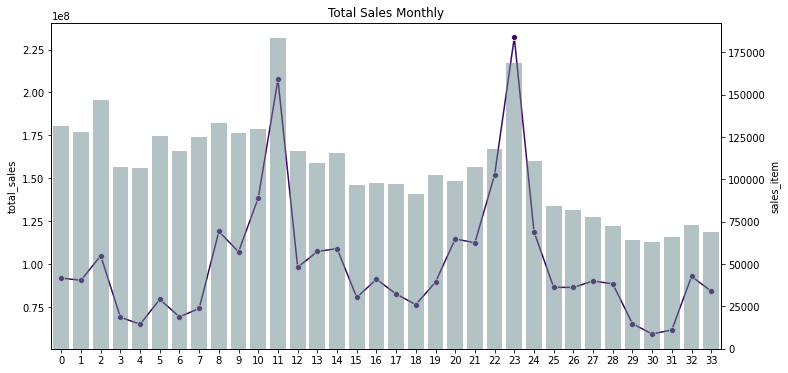

In [83]:
#3.4 monthly shop
monthly_sales = sales.groupby('date_block_num').agg(sales_item = ('item_cnt_day','sum'),total_sales = ('total_tr','sum'))
monthly_sales.reset_index(inplace=True)

#Sales Situation per month of the whole company
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=monthly_sales['total_sales'], marker='o', sort = False, ax=ax1,color='#3c0766',)
ax2 = ax1.twinx()
sns.barplot(x=monthly_sales['date_block_num'],y=monthly_sales['sales_item'],alpha=0.5, ax=ax2,color='#638a91')
#plt.set_xlabel("Months")
#plt.set_ylabel("Sales Price")
#plt.ylabel2("Shop Number")
plt.title("Total Sales Monthly")
plt.show()

Small conclusion: Here we can see the item sold declined but the total sales money have slight change. The price of products must increase generally.

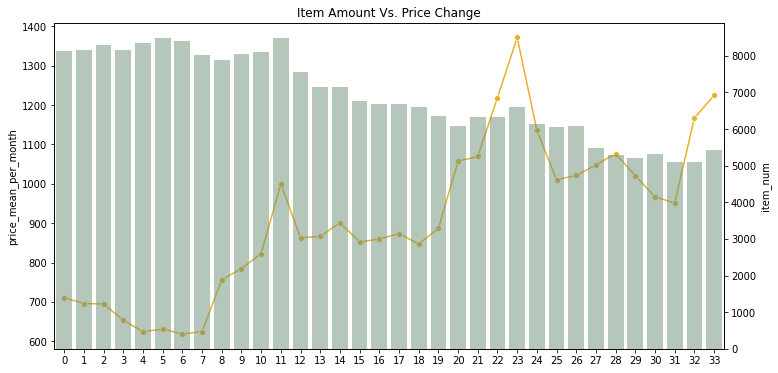

In [84]:
#3.5 monthly sales price
price_mean_per_month = sales.groupby('date_block_num').agg(price_mean_per_month = ('item_price','mean'),item_num = ('item_id',lambda x: x.nunique()))
price_mean_per_month.reset_index(inplace=True)
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=price_mean_per_month['price_mean_per_month'], marker='o', sort = False, ax=ax1,color='#e8b127',)
ax2 = ax1.twinx()
sns.barplot(x=price_mean_per_month['date_block_num'],y=price_mean_per_month['item_num'],alpha=0.5, ax=ax2,color='#669676')
#plt.set_xlabel("Months")
#plt.set_ylabel("Sales Price")
#plt.ylabel2("Shop Number")
plt.title("Item Amount Vs. Price Change")
plt.show()

It is not an officialy present but just want to approximately confirm: The general price of items did increase!

In [85]:
#3.6 Look at sales on per item in each shops
sales_monthly = sales.groupby(['shop_id','item_id']).agg(sales_per_item_shop = ('item_cnt_day','sum'),sales_price_per_item_shop = ('total_tr','sum'))
sales_per_item_shop['sales_per_item_shop'] = sales_per_item_shop['sales_per_item_shop'].astype(np.int32)
sales_per_item_shop

sales_per_item_shop  sales_price_per_item_shop
shop_id item_id                                                
2       27                         2                   2997.000
        30                         4                   1096.000
        31                         8                   5008.420
        32                        11                   1609.000
        33                        11                   2489.000
...                              ...                        ...
59      22154                      1                    999.000
        22155                      1                    149.000
        22162                     16                   6234.000
        22164                      6                   4344.000
        22167                      4                   1196.000

[418909 rows x 2 columns]

In [86]:
#3.7  abstract the year, month and day
sales['year']=sales['date'].dt.year
sales['month']=sales['date'].dt.month
sales['month'] = sales['date_block_num'] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
sales['days'] =sales['month'].map(days).astype(np.int8)
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,days,item_name,item_category_id,item_category_name,item_maincategory_name,shop_name,city_name,lat,lon,total_tr
0,2013-01-01,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
1,2013-01-03,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
2,2013-01-28,0,18,5823,2500.000,1.000,2013,0,31,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
3,2013-02-03,1,18,5823,2500.000,1.000,2013,1,28,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
4,2013-02-09,1,18,5823,2500.000,1.000,2013,1,28,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты оплаты,"Красноярск ТЦ ""Июнь""",Красноярск,56.009,92.873,2500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13095,500.000,2.000,2015,9,31,Карта оплаты Windows: 500 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,1000.000
2935845,2015-09-16,32,55,13094,2500.000,1.000,2015,8,30,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,2500.000
2935846,2015-09-22,32,55,13094,2500.000,2.000,2015,8,30,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,5000.000
2935847,2015-09-21,32,55,13091,1000.000,1.000,2015,8,30,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Карты оплаты,Цифровой склад 1С-Онлайн,Цифровой,50.029,36.328,1000.000


Text(0.5, 1.0, 'Sales per Year')

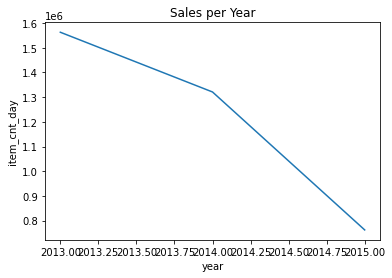

In [87]:
#3.8 see the sales per year
sales_per_year = sales.groupby('year').sum()[['item_cnt_day','total_tr']]
sales_per_year.reset_index(inplace=True)
sales_per_year['year'].astype(str)
sns.lineplot(data=sales_per_year, x='year',y='item_cnt_day')
plt.title('Sales per Year')
#sns.lineplot(data=shop_num_month['total_amount'], marker='o', sort = False, ax=ax1,color='#7338a1')

Small conclusion: The sales did drop down by years.

### Feature Engineering (lagging)

I see some examples would test the stationarity and decrease the unstability by diff/shiff(), but I use lagging to decline the characterization of time series, I do think I don't need to test stationary necessarily, right?

In [88]:
#see the trend of sales
#item_cnt_dec = sm.tsa.seasonal_decompose(monthly_sales["sales_item"].values,period=12,model="addictive").plot()

In [89]:
#see the trend of sales price
#item_cnt_dec = sm.tsa.seasonal_decompose(monthly_sales["total_sales"].values,period=12,model="addictive").plot()

In [90]:
#see the correlation first
#corrdata = sales.copy()
#corrs = corrdata.corr()
#plt.figure(figsize=(10,10))
#sns.heatmap(corrs, annot=True,fmt='.3f',xticklabels=corrs.columns.values,yticklabels=corrs.columns.values)
#plt.show()

Hahaha we can not see any thing here. Never mind.

In [91]:
# def lag_feature(df, lags, col):
#     tmp = df[['date_block_num','shop_id','item_id',col]]
#     for i in lags:
#         shifted = tmp.copy()
#         shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
#         shifted['date_block_num'] += i
#         df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
#     return df

In [92]:
#shops['city_code']=LabelEncoder().fit_transform(shops['city_name']).astype(np.int8)
#item_cat['item_maincategory_id']=LabelEncoder().fit_transform(item_cat['item_maincategory_name']).astype(np.int8)
#corrdata.drop(columns=['date','item_name', 'item_category_name', 'item_maincategory_name', 'shop_name', 'city_name','lat','lon'],axis=1, inplace=True)
#corrdata = pd.merge(corrdata,shops,on='shop_id',how='inner')
#corrdata = pd.merge(corrdata,item_cat,on='item_category_id',how='inner')
#feature_data = corrdata.copy().fillna(0)

In [93]:
#build up feature_lagdata for lagging
#feature_lagdata = []
#cols = ['date_block_num','shop_id','item_id']
#data = pd.DataFrame()
#for i in range(34):
#    data = feature_data [feature_data.date_block_num==i]  
#    feature_lagdata.append(np.array(list(product([i], data.shop_id.unique(), data.item_id.unique())), dtype='int16'))
# feature_lagdata = pd.DataFrame(np.vstack(feature_lagdata), columns=cols)
# feature_lagdata['date_block_num'] = feature_lagdata['date_block_num'].astype(np.int8)
# feature_lagdata['shop_id'] = feature_lagdata['shop_id'].astype(np.int8)
# feature_lagdata['item_id'] = feature_lagdata['item_id'].astype(np.int16)
# feature_lagdata.sort_values(cols,inplace=True)

# #insert test data into feature data
# test['date_block_num'] = 34
# test['date_block_num'] = test['date_block_num'].astype(np.int8)
# test['shop_id'] = test['shop_id'].astype(np.int8)
# test['item_id'] = test['item_id'].astype(np.int16)
# feature_lagdata = pd.concat([feature_lagdata, test[['item_id','shop_id','date_block_num']]], ignore_index=True, sort=False, keys=cols)
# feature_lagdata.fillna(0, inplace=True) # 34 month

# #insert city name/category info into feature data
# feature_lagdata = pd.merge(feature_lagdata, shops[['shop_id','city_name']], on=['shop_id'], how='left')
# feature_lagdata = pd.merge(feature_lagdata, item[['item_id','item_category_id']], on=['item_id'], how='left')
# feature_lagdata = pd.merge(feature_lagdata, item_cat[['item_maincategory_id','item_category_id']], on=['item_category_id'], how='left')
# feature_lagdata['item_category_id'] = feature_lagdata['item_category_id'].astype(np.int8)


# #insert sales per shop per month per item
# target = sales.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day':'sum'})
# target.columns = ['item_cnt_month']  #for test table: item_cnt_month
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['item_id','shop_id','date_block_num'], how = 'left')
# feature_lagdata['item_cnt_month'] = feature_lagdata['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16)
# feature_lagdata.head()

In [94]:
#create more features to lagging (see the trend, 12-month as a round is necessary)
#sales per shop per item per month
#feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'item_cnt_month')
#mean sales per month
# target = feature_lagdata.groupby(['date_block_num']).agg(date_avg_month_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = 'date_block_num', how = 'left')
# feature_lagdata['date_avg_month_cnt'] = feature_lagdata['date_avg_month_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_cnt')
# feature_lagdata.drop(['date_avg_month_cnt'], axis=1, inplace=True)
# #mean sales per item per month
# target = feature_lagdata.groupby(['date_block_num','item_id']).agg(date_avg_month_item_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','item_id'], how = 'left')
# feature_lagdata['date_avg_month_item_cnt'] = feature_lagdata['date_avg_month_item_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_item_cnt')
# feature_lagdata.drop(['date_avg_month_item_cnt'], axis=1, inplace=True)
# #mean sales per shop per month
# target = feature_lagdata.groupby(['date_block_num','shop_id']).agg(date_avg_month_shop_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','shop_id'], how = 'left')
# feature_lagdata['date_avg_month_shop_cnt'] = feature_lagdata['date_avg_month_shop_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_shop_cnt')
# feature_lagdata.drop(['date_avg_month_shop_cnt'], axis=1, inplace=True)
# #mean sales per cat per month
# target = feature_lagdata.groupby(['date_block_num','item_category_id']).agg(date_avg_month_cat_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','item_category_id'], how = 'left')
# feature_lagdata['date_avg_month_cat_cnt'] = feature_lagdata['date_avg_month_cat_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_cat_cnt')
# feature_lagdata.drop(['date_avg_month_cat_cnt'], axis=1, inplace=True)
# #mean sales per maincat per month
# target = feature_lagdata.groupby(['date_block_num','item_maincategory_id']).agg(date_avg_month_maincat_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','item_maincategory_id'], how = 'left')
# feature_lagdata['date_avg_month_maincat_cnt'] = feature_lagdata['date_avg_month_maincat_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_maincat_cnt')
# feature_lagdata.drop(['date_avg_month_maincat_cnt'], axis=1, inplace=True)
# #mean sales per cat per shop per month
# target = feature_lagdata.groupby(['date_block_num','item_category_id','item_id']).agg(date_avg_month_cat_shop_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','item_category_id','item_id'], how = 'left')
# feature_lagdata['date_avg_month_cat_shop_cnt'] = feature_lagdata['date_avg_month_cat_shop_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_cat_shop_cnt')
# feature_lagdata.drop(['date_avg_month_cat_shop_cnt'], axis=1, inplace=True)
# #mean sales per maincat per shop per month
# target = feature_lagdata.groupby(['date_block_num','item_maincategory_id','item_id']).agg(date_avg_month_maincat_shop_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata = pd.merge(feature_lagdata,target, on = ['date_block_num','item_maincategory_id','item_id'], how = 'left')
# feature_lagdata['date_avg_month_maincat_shop_cnt'] = feature_lagdata['date_avg_month_maincat_shop_cnt'].astype(np.float16)
# feature_lagdata = lag_feature(feature_lagdata, [1,2,3,6,12], 'date_avg_month_maincat_shop_cnt')
# feature_lagdata.drop(['date_avg_month_maincat_shop_cnt'], axis=1, inplace=True)
#---------------------------------------------

In [95]:
# feature_lagdata1 = feature_lagdata.copy()

In [96]:
#mean sales per city per month
# target = feature_lagdata1.groupby(['date_block_num','city_name']).agg(date_avg_month_city_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata1 = pd.merge(feature_lagdata1,target, on = ['date_block_num','city_name'], how = 'left')
# feature_lagdata1['date_avg_month_city_cnt'] = feature_lagdata1['date_avg_month_city_cnt'].astype(np.float16)
# feature_lagdata1 = lag_feature(feature_lagdata1, [1,2,3,6,12], 'date_avg_month_city_cnt')
# feature_lagdata1.drop(['date_avg_month_city_cnt'], axis=1, inplace=True)
# #mean sales per shop per city
# target = feature_lagdata1.groupby(['date_block_num','shop_id','city_name']).agg(date_avg_month_shop_city_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata1 = pd.merge(feature_lagdata1,target, on = ['date_block_num','shop_id','city_name'], how = 'left')
# feature_lagdata1['date_avg_month_shop_city_cnt'] = feature_lagdata1['date_avg_month_shop_city_cnt'].astype(np.float16)
# feature_lagdata1 = lag_feature(feature_lagdata1, [1,2,3,6,12], 'date_avg_month_shop_city_cnt')
# feature_lagdata1.drop(['date_avg_month_shop_city_cnt'], axis=1, inplace=True)
# #mean sales per shop per item per city
# target = feature_lagdata1.groupby(['date_block_num','item_id','city_name']).agg(date_avg_month_item_city_cnt=('item_cnt_month','mean'))
# target.reset_index(inplace=True)
# feature_lagdata1 = pd.merge(feature_lagdata1,target, on = ['date_block_num','item_id','city_name'], how = 'left')
# feature_lagdata1['date_avg_month_item_city_cnt'] = feature_lagdata1['date_avg_month_item_city_cnt'].astype(np.float16)
# feature_lagdata1 = lag_feature(feature_lagdata1, [1,2,3,6,12], 'date_avg_month_item_city_cnt')
# feature_lagdata1.drop(['date_avg_month_item_city_cnt'], axis=1, inplace=True)

#------------------------------------------

In [97]:
# feature_lagdata2 = feature_lagdata1.copy()

In [98]:
# target = sales.groupby(['item_id']).agg(price_avg_item=('item_price', 'mean'))
# target.reset_index(inplace=True)
# feature_lagdata2 = pd.merge(feature_lagdata2, target, on=['item_id'], how='left')
# feature_lagdata2['price_avg_item'] = feature_lagdata2['price_avg_item'].astype(np.float16)

# target = sales.groupby(['date_block_num','item_id']).agg(date_price_avg_item=('item_price', 'mean'))
# target.reset_index(inplace=True)
# feature_lagdata2 = pd.merge(feature_lagdata2, target, on=['date_block_num','item_id'], how='left')
# feature_lagdata2['date_price_avg_item'] = feature_lagdata2['date_price_avg_item'].astype(np.float16)

# #price changes per item
# feature_lagdata2 = lag_feature(feature_lagdata2, [1,2,3,4,5,6,12], 'date_price_avg_item')

# lags=[1,2,3,4,5,6,12]
# for i in lags:
#     feature_lagdata2['delta_price_lag_'+str(i)] = \
#         (feature_lagdata2['date_price_avg_item_lag_'+str(i)] - feature_lagdata2['price_avg_item']) / feature_lagdata2['price_avg_item']

In [99]:
# def select_trend(row):  #for what?
#     for i in lags:
#         if row['delta_price_lag_'+str(i)]:
#             return row['delta_price_lag_'+str(i)]
#     return 0

In [100]:
# feature_lagdata2['delta_price_lag'] = feature_lagdata2.apply(select_trend, axis=1)
# feature_lagdata2['delta_price_lag'] = feature_lagdata2['delta_price_lag'].astype(np.float16)
# feature_lagdata2['delta_price_lag'].fillna(0, inplace=True)

# # https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns/31828559
# # matrix['price_trend'] = matrix[['delta_price_lag_1','delta_price_lag_2','delta_price_lag_3']].bfill(axis=1).iloc[:, 0]
# # Invalid dtype for backfill_2d [float16]

# fetures_to_drop = ['price_avg_item', 'date_price_avg_item']
# for i in lags:
#     fetures_to_drop += ['date_price_avg_item_lag_'+str(i)]
#     fetures_to_drop += ['delta_price_lag_'+str(i)]

# feature_lagdata2.drop(fetures_to_drop, axis=1, inplace=True)
# #----------------------------------

In [101]:
#last sales per item
# cache = {}
# feature_lagdata2['item_shop_last_sale'] = -1
# feature_lagdata2['item_shop_last_sale'] = feature_lagdata2['item_shop_last_sale'].astype(np.int8)
# for index, row in feature_lagdata2.iterrows():    
#     key = str(row.item_id)+' '+str(row.shop_id)
#     if key not in cache:
#         if row.item_cnt_month!=0:
#             cache[key] = row.date_block_num
#     else:
#         last_date_block_num = cache[key]
#         feature_lagdata2.at[index, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
#         cache[key] = row.date_block_num   
        
# #first sales per item
# feature_lagdata2['item_shop_first_sale'] = feature_lagdata2['date_block_num'] - feature_lagdata2.groupby(['item_id','shop_id'])['date_block_num'].transform('min')
# feature_lagdata2['item_first_sale'] = feature_lagdata2['date_block_num'] - feature_lagdata2.groupby('item_id')['date_block_num'].transform('min')


In [102]:
# feature_lagdata2 = feature_lagdata2[feature_lagdata2.date_block_num > 11]

In [103]:
# def fill_na(df):
#     for col in df.columns:
#         if ('_lag_' in col) & (df[col].isnull().any()):
#             if ('item_cnt' in col):
#                 df[col].fillna(0, inplace=True)         
#     return df

# feature_lagdata2 = fill_na(feature_lagdata2)

In [104]:
# feature_lagdata2.to_csv('feature_lagdata.csv',index=False)
# feature_lagdata3 = feature_lagdata2.copy()
# feature_lagdata3.drop(columns=['city_name'],axis=1,inplace=True)

In [105]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 100)
# #data = pd.read_pickle('data_simple.pkl')
# X_train = feature_lagdata3[feature_lagdata3.date_block_num < 33].drop(['item_cnt_month'], axis=1)
# Y_train = feature_lagdata3[feature_lagdata3.date_block_num < 33]['item_cnt_month']
# X_valid = feature_lagdata3[feature_lagdata3.date_block_num == 33].drop(['item_cnt_month'], axis=1)
# Y_valid = feature_lagdata3[feature_lagdata3.date_block_num == 33]['item_cnt_month']
# X_test = feature_lagdata3[feature_lagdata3.date_block_num == 34].drop(['item_cnt_month'], axis=1)
# #del target
# gc.collect()

In [106]:
# X_train.fillna(0,inplace=True)
# Y_train.fillna(0,inplace=True)
# X_valid.fillna(0,inplace=True)
# Y_valid.fillna(0,inplace=True)
# X_test.fillna(0,inplace=True)

In [107]:
# LinearRegression
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#model=lr
#model.fit(X_train,Y_train)
#pred_test = model.predict(X_test)
#pred_train = model.predict(X_train)
#from sklearn.metrics import mean_squared_error
#from math import sqrt
#print('Train dataset accuracy for %s is %f' % ('LinearRegression', sqrt(mean_squared_error(Y_train.clip(0,20), pred_train.clip(0,20)))))
#print('Valid dataset accuracy for %s is %f' % ('lightgbm', sqrt(mean_squared_error(Y_valid.clip(0,20), pred_valid.clip(0,20)))))

In [108]:
#Xgboost
# model = XGBRegressor(
#     max_depth=8,
#     n_estimators=1000,
#     min_child_weight=300, 
#     colsample_bytree=0.8, 
#     subsample=0.8, 
#     eta=0.3,    
#     seed=42)

# model.fit(
#     X_train, 
#     Y_train, 
#     eval_metric="rmse", 
#     eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
#     verbose=True, 
#     early_stopping_rounds = 10)
# pred_valid = model.predict(X_valid).clip(0, 20)
# pred_train = model.predict(X_train).clip(0, 20)
# pred_test = model.predict(X_test).clip(0, 20)
# print('Train dataset accuracy for %s is %f' % ('Xgboost', sqrt(mean_squared_error(Y_train, pred_train))))
# print('Valid dataset accuracy for %s is %f' % ('Xgboost', sqrt(mean_squared_error(Y_valid, pred_valid))))

In [109]:
# xgboostpred_result = pred_test.copy()
# xgboostpred_result = pd.DataFrame(xgboostpred_result)
# #xgboostpred_result.to_csv('xgboostpred_result.csv',index=False)

In [110]:
# test['item_cnt_month'] = xgboostpred_result
# test

In [111]:
# plot_features(model, (10,20))

References:
<ol>
    <li>https://blog.csdn.net/s09094031/article/details/90347191</li>
    <li>https://www.kaggle.com/kashishrastogi/store-sales-analysis-time-serie</li>
</ol>

*Because the memory of kaggle notebook id not enough, the final result cannot show out.*